In [6]:
# dataset: https://www.kaggle.com/c/dogs-vs-cats only 10%
# !kaggle competitions download -c dogs-vs-cats

In [7]:
import os

import torch

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

import warnings
warnings.filterwarnings("ignore")

In [8]:
from v1.pipelines import get_model_UpSi, train_model_UpSi
from v2.pipelines import get_model_UpSi2, train_model_UpSi2
# from v1.pipelines import get_model_resnet18, train_model_resnet18 

In [10]:
transform_train = transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
transform_test = transforms.Compose([
        transforms.Resize(244),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

In [11]:
DATA_PATH = '/dogs-vs-cats'
batch_size = 32
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [12]:
train_dataset = ImageFolder('.' + DATA_PATH + '/train', transform_train)   
test_dataset = ImageFolder('.' + DATA_PATH + '/val', transform_test)   

In [13]:
train_loader = DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=1)
test_loader = DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False, num_workers=1)

In [14]:
dataloaders = {'train': train_loader,
               'test': test_loader}

In [15]:
for_tests = next(iter(test_loader))
tests = [for_tests[0][0].unsqueeze(0),
        for_tests[0][22].unsqueeze(0)]

In [16]:
model_v1 = get_model_UpSi(after_layer='after_layer2', out_classes=2, device=device) 

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [17]:
#ResNet18
# modelr = get_model_resnet18(out_classes=2)
# modelr = modelr.to(device)
# new_r = train_model_resnet18(modelr, device=device, dataloaders=dataloaders, num_epochs=15, save=True, name='resnet18')
# model_v1.linear = modelr.fc

All train process:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch (train)- 1:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch (test)- 1:   0%|          | 0/20 [00:00<?, ?it/s]

UpSi_v1 - Epoch-1 test loss:0.748 <->  accuracy: 0.611
class_loss:0.746, contiguity_loss:0.000, sparsity_loss:0.001


Epoch (train)- 2:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch (test)- 2:   0%|          | 0/20 [00:00<?, ?it/s]

UpSi_v1 - Epoch-2 test loss:0.783 <->  accuracy: 0.808
class_loss:0.775, contiguity_loss:0.003, sparsity_loss:0.005


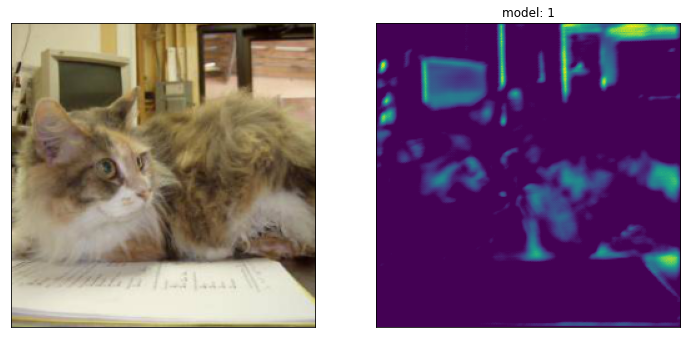

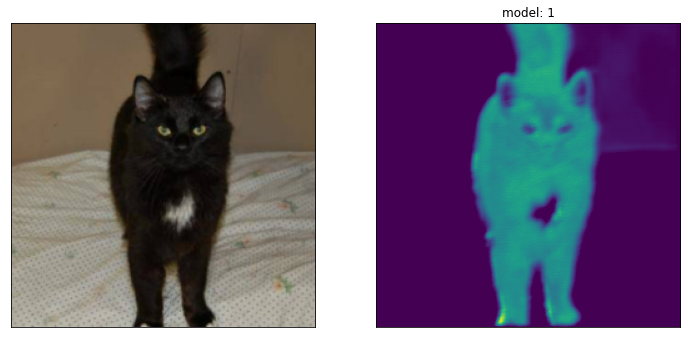

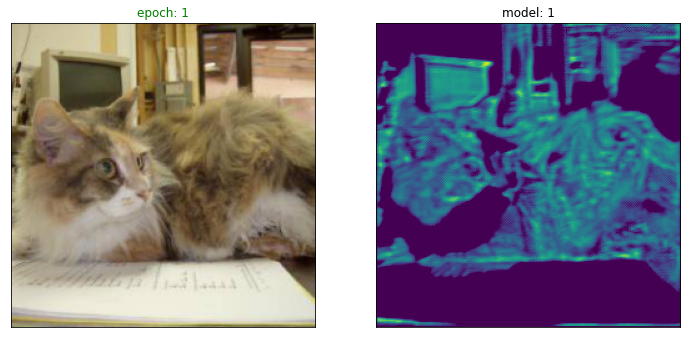

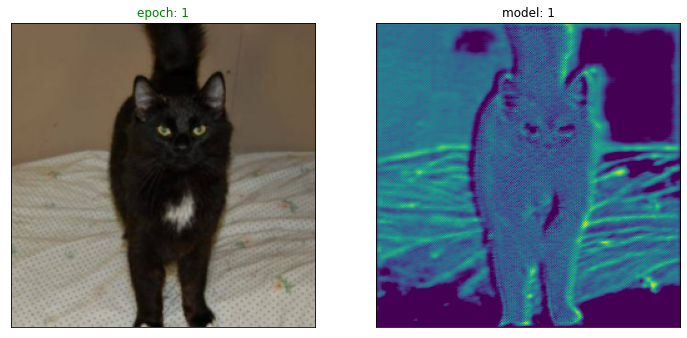

In [18]:
res_v1 = train_model_UpSi(model_v1, device=device, dataloaders=dataloaders, losses_weights=[1, 0.5, 0.01], num_epochs=2, modes=['unet', 'resnet_1', 'linear'], name='UpSi_v1', save_model=2, show_tests=True, test_data=tests)

In [19]:
model_v2 = get_model_UpSi2(out_classes=2, device=device, modes=[1, 1, 0], down_conv=False) 

All train process:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch (train)- 1:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch (test)- 1:   0%|          | 0/20 [00:00<?, ?it/s]

UpSi_v2 - Epoch-1 test loss:0.853 <->  accuracy: 0.500
class_loss:0.853, contiguity_loss:0.000, sparsity_loss:0.001


Epoch (train)- 2:   0%|          | 0/59 [00:00<?, ?it/s]

Epoch (test)- 2:   0%|          | 0/20 [00:00<?, ?it/s]

UpSi_v2 - Epoch-2 test loss:0.624 <->  accuracy: 0.498
class_loss:0.617, contiguity_loss:0.000, sparsity_loss:0.007


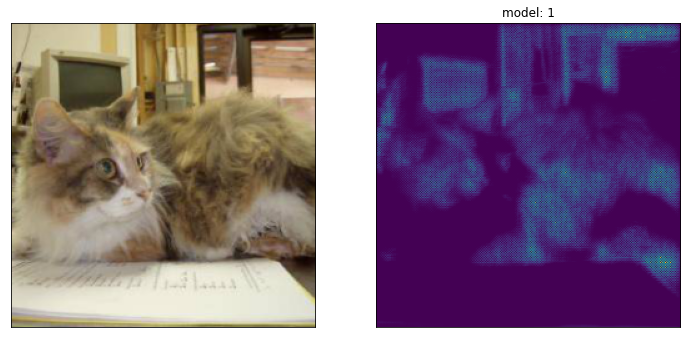

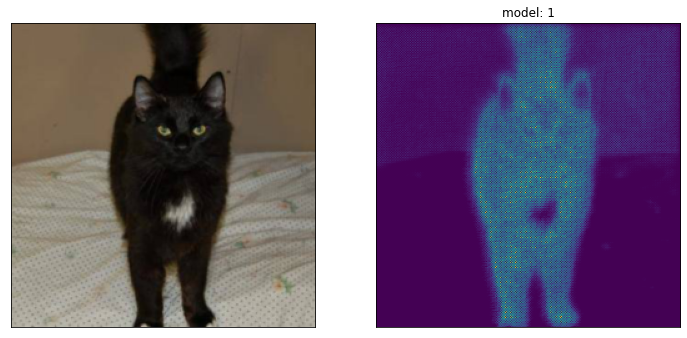

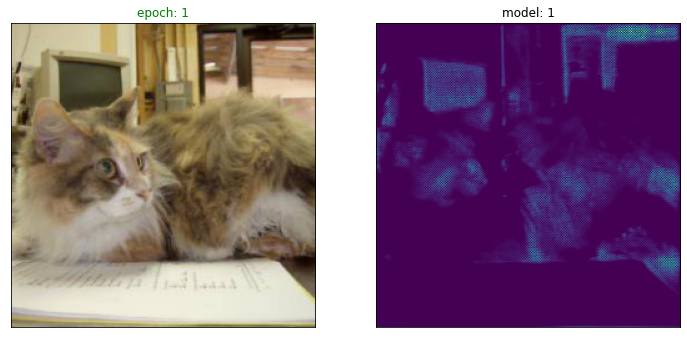

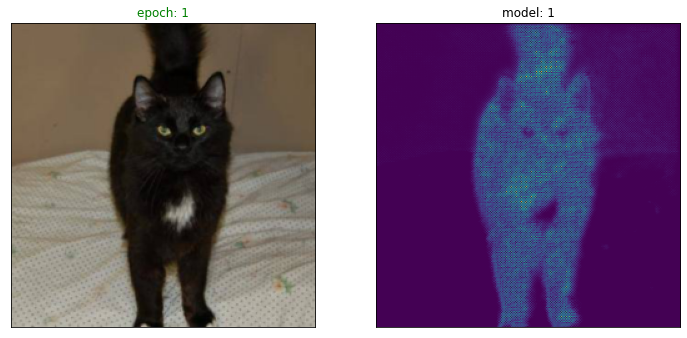

In [20]:
res_v2 = train_model_UpSi2(model_v2, device=device, dataloaders=dataloaders, losses_weights=[1, 0.5, 0.05], num_epochs=2, modes=['resnet_1', 'resnet_2'], name='UpSi_v2', down_conv=False, save_model=2, show_tests=True, test_data=tests)